# Sentiment analysis of x

In [ ]:
!pip install vaderSentiment
import requests
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def fetch_tweets(query, cursor=None):
    url = "https://twitter-api45.p.rapidapi.com/search.php"
    headers = {
        "x-rapidapi-key": "4ec154cc17mshfb1a17a88a74772p159e36jsn6467a42c7d46",
        "x-rapidapi-host": "twitter-api45.p.rapidapi.com"
    }
    querystring = {"query": query, "search_type": "Latest"}
    if cursor:
        querystring["cursor"] = cursor

    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        data = response.json()
        return data.get("timeline", []), data.get("next_cursor")  # Return tweets and next cursor
    else:
        print(f"Error: {response.status_code}")
        return [], None

def analyze_sentiment(tweets):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_data = []
    positive_count = neutral_count = negative_count = 0  # Initialize sentiment counters

    for tweet in tweets:
        text = tweet.get("text", "")
        sentiment_score = analyzer.polarity_scores(text)
        label = "neutral"

        # Determine sentiment label
        if sentiment_score["compound"] >= 0.05:
            label = "positive"
            positive_count += 1
        elif sentiment_score["compound"] <= -0.05:
            label = "negative"
            negative_count += 1
        else:
            neutral_count += 1

        sentiment_data.append({
            "tweet": text,
            "positive": sentiment_score["pos"],
            "neutral": sentiment_score["neu"],
            "negative": sentiment_score["neg"],
            "compound": sentiment_score["compound"],
            "label": label
        })

    return sentiment_data, positive_count, neutral_count, negative_count

def get_recommendation(positive_count, neutral_count, negative_count):
    if positive_count > neutral_count and positive_count > negative_count:
        return "Buy"
    elif negative_count > positive_count and negative_count > neutral_count:
        return "Sell"
    else:
        return "Hold"

def save_to_csv(sentiment_data, filename="tweet_sentiment_analysis.csv"):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=["tweet", "positive", "neutral", "negative", "compound", "label"])
        writer.writeheader()
        for data in sentiment_data:
            writer.writerow(data)
    print(f"Data saved to {filename}")

def main():
    query = input("Enter a company or keyword to analyze sentiment (e.g., 'cybertruck'): ")
    all_sentiment_data = []
    cursor = None
    api_call_count = 0  # Initialize API call counter
    total_positive = total_neutral = total_negative = 0  # Total sentiment counters

    # Fetch tweets iteratively using the cursor, limit to 5 API calls
    while api_call_count < 5:
        tweets, cursor = fetch_tweets(query, cursor)
        api_call_count += 1  # Increment the API call count
        if not tweets:
            break
        sentiment_data, positive_count, neutral_count, negative_count = analyze_sentiment(tweets)
        total_positive += positive_count
        total_neutral += neutral_count
        total_negative += negative_count
        all_sentiment_data.extend(sentiment_data)
        if not cursor:
            break  # Stop if no more tweets are available

    if all_sentiment_data:
        save_to_csv(all_sentiment_data)

        # Get recommendation based on overall sentiment
        recommendation = get_recommendation(total_positive, total_neutral, total_negative)
        print(f"Recommendation based on sentiment analysis: {recommendation}")
    else:
        print("No tweets found for this query.")

if __name__ == "__main__":
    main()


Enter a company or keyword to analyze sentiment (e.g., 'cybertruck'): HDFC BANK SHARE PRICE
Data saved to tweet_sentiment_analysis.csv
Recommendation based on sentiment analysis: Buy


# Article

In [ ]:
!pip install nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
import pandas as pd
import numpy as np

import pandas_datareader as pdr
import matplotlib.pyplot as plt

data_amd = pdr.get_data_yahoo('AMD', '24-Feb-20')
data_amd.head()

AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf # Import yfinance
import matplotlib.pyplot as plt

# Use yfinance to download the data
data_amd = yf.download('HDFCBANK.NS', start='2020-10-29')

data_amd.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
Date,,,,,,
2020-10-29 00:00:00+00:00,1139.686523,1187.199951,1204.449951,1178.500000,1200.599976,11530012
2020-10-30 00:00:00+00:00,1136.182617,1183.550049,1199.300049,1176.349976,1182.550049,5761358
2020-11-02 00:00:00+00:00,1166.614014,1215.250000,1225.000000,1177.500000,1194.349976,10963040
2020-11-03 00:00:00+00:00,1198.005371,1247.949951,1250.750000,1225.500000,1226.449951,14082115
2020-11-04 00:00:00+00:00,1207.077026,1257.400024,1264.800049,1230.000000,1252.000000,11702411


In [ ]:
data_amd['2_SMA'] = data_amd['Close'].rolling(window=2).mean()
data_amd['5_SMA'] = data_amd['Close'].rolling(window=5).mean()

data_amd = data_amd[data_amd['5_SMA'].notna()]

# SMA trade calls
Trade_Buy=[]
Trade_Sell=[]
for i in range(len(data_amd)-1):
    if ((data_amd['2_SMA'].values[i] < data_amd['5_SMA'].values[i]) & (data_amd['2_SMA'].values[i+1] > data_amd['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Buy.".format(row=data_amd.index[i].date()))
        Trade_Buy.append(i)
    elif ((data_amd['2_SMA'].values[i] > data_amd['5_SMA'].values[i]) & (data_amd['2_SMA'].values[i+1] < data_amd['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Sell.".format(row=data_amd.index[i].date()))
        Trade_Sell.append(i)

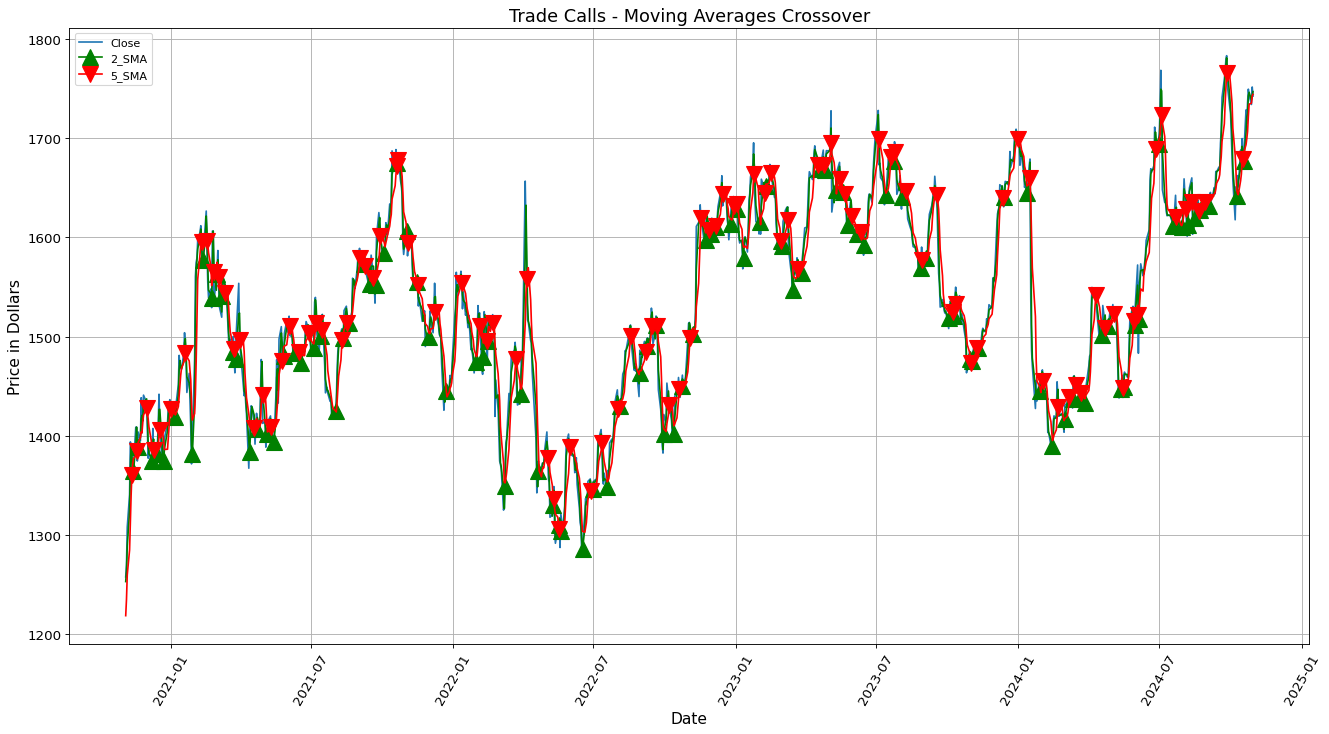

In [ ]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_amd.index, data_amd['Close'])
plt.plot(data_amd.index, data_amd['2_SMA'],'-^', markevery=Trade_Buy, ms=15, color='green')
plt.plot(data_amd.index, data_amd['5_SMA'],'-v', markevery=Trade_Sell, ms=15, color='red')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12) # Changed '60' to 60
plt.yticks(fontsize=12)
plt.title('Trade Calls - Moving Averages Crossover', fontsize = 16)
plt.legend(['Close','2_SMA','5_SMA'])
plt.grid()
plt.show()

In [ ]:
import requests
# Define the endpoint
url = 'https://newsapi.org/v2/everything?'

# Specify the query and number of returns
parameters = {
    'q': 'HDFC BANK stock price', # query phrase
    'sortBy': 'popularity', # articles from popular sources and publishers come first
    'pageSize': 100,  # maximum is 100 for developer version
    'apiKey': '9791a2c17cc34dbe8e91fe5ac98428e2', # your own API key
}

# Make the request
response = requests.get(url, params=parameters)

# Convert the response to JSON format and store it in dataframe
data = pd.DataFrame(response.json())

news_df = pd.concat([data['articles'].apply(pd.Series)], axis=1)
print(news_df);
final_news = news_df.loc[:,['publishedAt','title']]
final_news['publishedAt'] = pd.to_datetime(final_news['publishedAt'])
final_news.sort_values(by='publishedAt',inplace=True)

# Import BDay to determine business day's dates
from pandas.tseries.offsets import BDay

# to get the business day for which particular news headline should be used to make trade calls
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=13,minute=30) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=20,minute=0) - BDay(0)

    prev_date_close = (curr_date_open - BDay()).replace(hour=20,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13,minute=30)

    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

 # Apply the above function to get the trading time for each news headline
final_news["trading_time"] = final_news["publishedAt"].apply(get_trade_open)

final_news = final_news[pd.notnull(final_news['trading_time'])]
final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)

                                               source  \
0   {'id': 'the-times-of-india', 'name': 'The Time...   
1   {'id': 'the-times-of-india', 'name': 'The Time...   
2   {'id': 'the-times-of-india', 'name': 'The Time...   
3   {'id': 'the-times-of-india', 'name': 'The Time...   
4   {'id': 'the-times-of-india', 'name': 'The Time...   
..                                                ...   
95  {'id': 'the-times-of-india', 'name': 'The Time...   
96  {'id': 'the-times-of-india', 'name': 'The Time...   
97  {'id': 'the-times-of-india', 'name': 'The Time...   
98  {'id': 'the-times-of-india', 'name': 'The Time...   
99  {'id': 'the-times-of-india', 'name': 'The Time...   

                             author  \
0   Sangita Mehta and Sruthijith KK   
1                   Nishtha Awasthi   
2                         ET Bureau   
3                               PTI   
4                         ET Bureau   
..                              ...   
95                    ETMarkets.com   
96 

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

cs = []
for row in range(len(final_news)):
    cs.append(analyzer.polarity_scores(final_news['title'].iloc[row])['compound'])

final_news['compound_vader_score'] = cs
final_news = final_news[(final_news[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)

final_news.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,publishedAt,title,trading_time,Date,compound_vader_score
0,2024-10-01 00:00:00+00:00,Kotak Mahindra aiming to be no 3 private bank ...,2024-10-01 13:30:00+00:00,2024-10-01,0.1779
1,2024-10-01 04:54:19+00:00,"Buy Route Mobile, target price Rs 2,100: HDFC ...",2024-10-01 13:30:00+00:00,2024-10-01,0.2960
2,2024-10-01 05:00:35+00:00,HDFC AMC shares up 1.11% as Sensex rises,2024-10-01 13:30:00+00:00,2024-10-01,0.2960
3,2024-10-01 05:41:27+00:00,Bank of Baroda shares gain 0.58% as Sensex falls,2024-10-01 13:30:00+00:00,2024-10-01,0.6808
4,2024-10-01 10:40:17+00:00,Stock market update: Stocks that hit 52-week l...,2024-10-01 13:30:00+00:00,2024-10-01,-0.2023


In [ ]:
unique_dates = final_news['Date'].unique()
grouped_dates = final_news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_vader_score"].max() > 0:
        max_cs.append(data["compound_vader_score"].max())
    elif data["compound_vader_score"].max() < 0:
        max_cs.append(0)

    if data["compound_vader_score"].min() < 0:
        min_cs.append(data["compound_vader_score"].min())
    elif data["compound_vader_score"].min() > 0:
        min_cs.append(0)

extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

<ipython-input-6-ff56f9339e43>:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data = grouped_dates.get_group(key)


In [ ]:
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores

extreme_scores_df.head()

,Date,max_scores,min_scores,final_scores
0,2024-10-01,0.6808,-0.2023,0.4785
1,2024-10-03,0.5994,-0.2023,0.3971
2,2024-10-04,0.7430,0.0000,0.7430
3,2024-10-07,0.5994,0.0000,0.5994
4,2024-10-08,0.5994,0.0000,0.5994


In [ ]:
# VADER trade calls - with threshold
vader_Buy=[]
vader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.20:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.20:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Sell.append(extreme_scores_df['Date'].iloc[i].date())

Trade Call for 2024-10-01 is Buy.
Trade Call for 2024-10-03 is Buy.
Trade Call for 2024-10-04 is Buy.
Trade Call for 2024-10-07 is Buy.
Trade Call for 2024-10-08 is Buy.
Trade Call for 2024-10-09 is Buy.
Trade Call for 2024-10-15 is Buy.
Trade Call for 2024-10-18 is Buy.
Trade Call for 2024-10-22 is Buy.
Trade Call for 2024-10-23 is Buy.
Trade Call for 2024-10-24 is Buy.
Trade Call for 2024-10-28 is Buy.
Trade Call for 2024-10-29 is Buy.


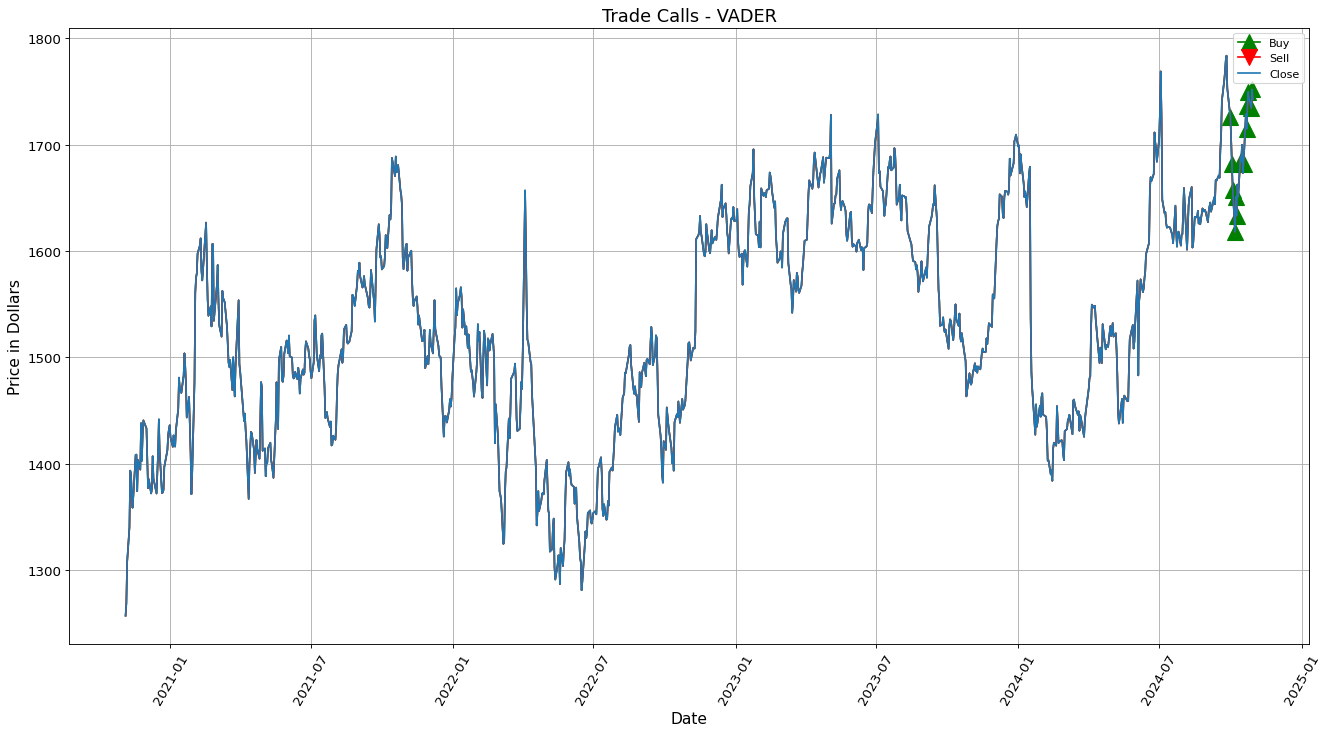

In [ ]:
vader_buy = []
for i in range(len(data_amd)):
    if data_amd.index[i].date() in vader_Buy:
        vader_buy.append(i)


vader_sell = []
for i in range(len(data_amd)):
    if data_amd.index[i].date() in vader_Sell:
        vader_sell.append(i)

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_amd.index, data_amd['Close'],'-^', markevery=vader_buy, ms=15, color='green')
plt.plot(data_amd.index, data_amd['Close'],'-v', markevery=vader_sell, ms=15, color='red')
plt.plot(data_amd.index, data_amd['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - VADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.grid()
plt.show()

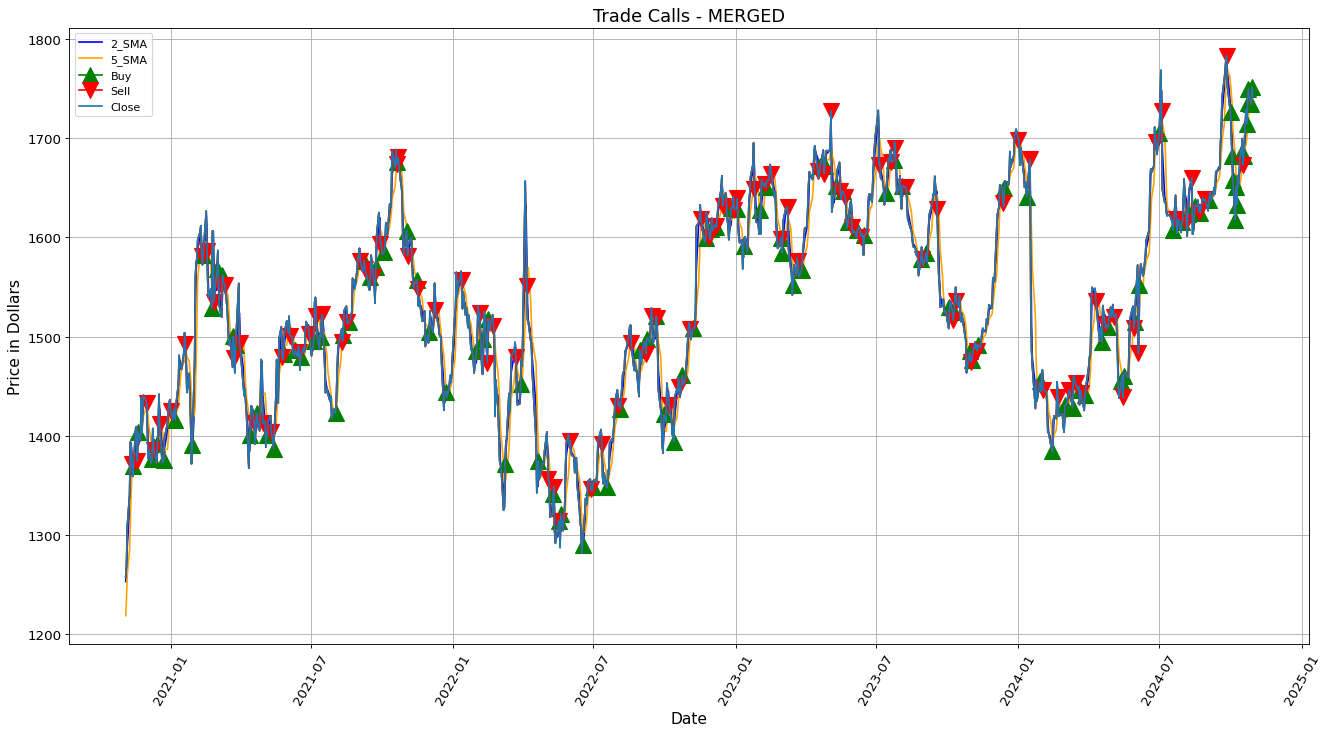

In [ ]:
#prioritising SMA signals
final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell))
final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_amd.index, data_amd['2_SMA'], color='blue')
plt.plot(data_amd.index, data_amd['5_SMA'], color='orange')
plt.plot(data_amd.index, data_amd['Close'],'-^', markevery=final_buy, ms=15, color='green')
plt.plot(data_amd.index, data_amd['Close'],'-v', markevery=final_sell, ms=15, color='red')
plt.plot(data_amd.index, data_amd['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','5_SMA','Buy','Sell','Close'])
plt.grid()
plt.show()

# ChatGPT

In [ ]:
!pip install vaderSentiment yfinance tensorflow scikit-learn pandas numpy newsapi-python


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load historical stock data
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Preprocess the data for LSTM
def preprocess_data(data):
    data.reset_index(inplace=True)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data[['Close', 'Volume']])

    X, y = [], []
    look_back = 60  # days of past data for prediction
    for i in range(look_back, len(data_scaled)):
        X.append(data_scaled[i-look_back:i])
        y.append(data_scaled[i, 0])

    X, y = np.array(X), np.array(y)
    return X, y, scaler

# Build and train the LSTM model
def build_and_train_model(X, y):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
    model.add(LSTM(units=100))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=20, batch_size=32)
    return model

# Predict future stock prices
def predict_future_price(model, last_data, scaler):
    last_data_scaled = scaler.transform(last_data[['Close', 'Volume']].values[-60:])
    X_test = np.array([last_data_scaled])
    predicted_price_scaled = model.predict(X_test)
    predicted_price = scaler.inverse_transform([[predicted_price_scaled[0][0], 0]])[0][0]
    return predicted_price

# Main function
def main():
    ticker = "HDFCBANK.NS"
    start_date = "2020-01-01"
    end_date = "2024-10-30"
    stock_data = load_stock_data(ticker, start_date, end_date)
    X, y, scaler = preprocess_data(stock_data)
    model = build_and_train_model(X, y)
    future_price = predict_future_price(model, stock_data, scaler)
    print(f"Predicted future stock price: {future_price}")

if __name__ == "__main__":
    main()


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.1055
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.0035
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0025
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0024
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0022
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0021
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0021
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0020
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0019
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0017
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0018
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0017
Epoch 13/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0014
Epoch 14/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0016
Epoch 15/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0015
Epoch 16/20


9791a2c17cc34dbe8e91fe5ac98428e2
2c715416639247409618f286ed62aa80

In [ ]:
from newsapi import NewsApiClient
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Function to calculate sentiment score using VADER
def get_sentiment_score(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)
    return score['compound']

# Load and process news sentiment data from News API
def load_news_sentiment(start_date, end_date, ticker):
    newsapi = NewsApiClient(api_key="2c715416639247409618f286ed62aa80")
    date_range = pd.date_range(start=start_date, end=end_date)
    sentiment_scores = []

    for date in date_range:
        date_str = date.strftime('%Y-%m-%d')

        # Fetch headlines for the specific date related to the stock
        all_articles = newsapi.get_everything(
            q=ticker,
            from_param=date_str,
            to=date_str,
            language="en",
            sort_by="relevancy",
            page_size=5  # Number of articles per date
        )

        # Calculate sentiment for each headline
        daily_sentiments = [get_sentiment_score(article['title']) for article in all_articles['articles']]

        # Calculate daily average sentiment score
        if daily_sentiments:
            daily_avg_sentiment = np.mean(daily_sentiments)
        else:
            daily_avg_sentiment = 0  # Default to neutral if no articles found

        sentiment_scores.append({'date': date, 'sentiment_score': daily_avg_sentiment})

    sentiment_df = pd.DataFrame(sentiment_scores)
    sentiment_df.set_index('date', inplace=True)
    return sentiment_df

# Determine buy/sell/hold based on sentiment
def sentiment_recommendation(sentiment_df):
    avg_sentiment = sentiment_df['sentiment_score'].mean()
    if avg_sentiment > 0.2:
        return "BUY"
    elif avg_sentiment < -0.2:
        return "SELL"
    else:
        return "HOLD"

# Main function
def main():
    start_date = "2024-09-30"
    end_date = "2024-10-30"
    ticker = "HDFC Bank"
    sentiment_data = load_news_sentiment(start_date, end_date, ticker)
    recommendation = sentiment_recommendation(sentiment_data)

    print(sentiment_data)
    print(f"Sentiment-based recommendation: {recommendation}")

if __name__ == "__main__":
    main()


            sentiment_score
date                       
2024-09-30          0.11900
2024-10-01          0.19724
2024-10-02         -0.01438
2024-10-03          0.16012
2024-10-04          0.25210
2024-10-05          0.00000
2024-10-06          0.15202
2024-10-07          0.09176
2024-10-08          0.47624
2024-10-09          0.49868
2024-10-10          0.12886
2024-10-11          0.32230
2024-10-12          0.04802
2024-10-13          0.24042
2024-10-14          0.37094
2024-10-15          0.11656
2024-10-16          0.24974
2024-10-17          0.00516
2024-10-18          0.43172
2024-10-19          0.32176
2024-10-20          0.39950
2024-10-21         -0.00444
2024-10-22          0.32376
2024-10-23          0.24640
2024-10-24          0.11596
2024-10-25          0.17310
2024-10-26          0.14352
2024-10-27          0.36104
2024-10-28          0.23232
2024-10-29          0.33848
2024-10-30          0.00000
Sentiment-based recommendation: BUY


# Github

In [14]:
!pip install pandas numpy yfinance statsmodels scikit-learn keras matplotlib alpha-vantage tweepy textblob

[*********************100%***********************]  1 of 1 completed


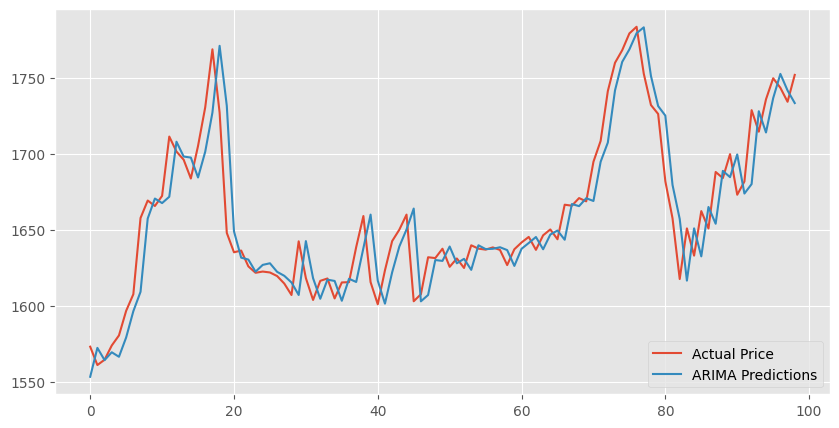

ARIMA RMSE: 21.68799801218233


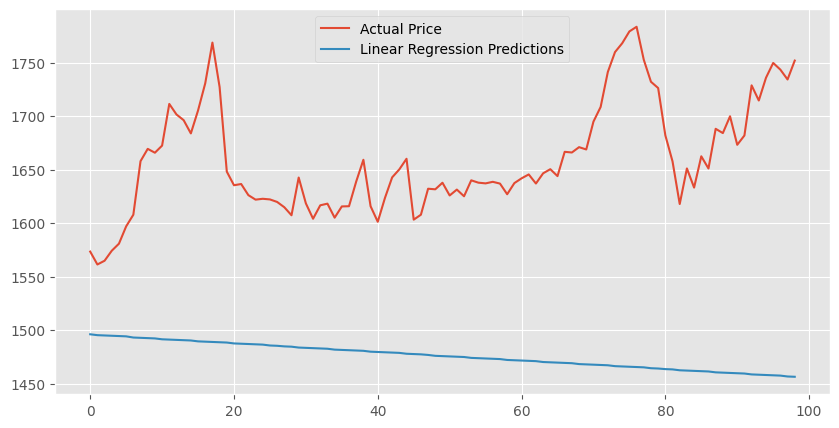

Linear Regression RMSE: 192.49867697565202
Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.2918
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0506
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0274
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0208
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0181
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0186
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0161
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0160
Epoch 9/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0149
Epoch 10/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0178
Epoch 11/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0160
Epoch 12/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0151
Epoch 13/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0132
Epoch 14/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0240
Epoch 15/25
13/13 ━━━━━━━━━━

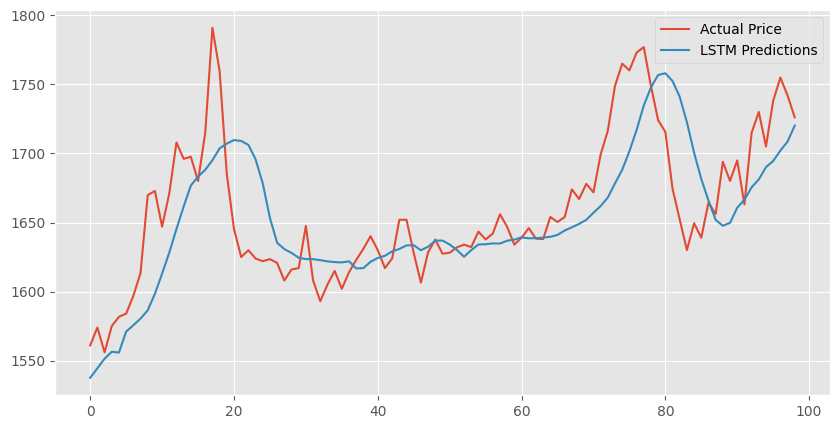

LSTM RMSE: 37.73543635817733


In [20]:
#**************** IMPORT PACKAGES ********************
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math
from datetime import datetime
import yfinance as yf
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#**************** FUNCTIONS TO FETCH DATA ***************************
def get_historical(quote):
    end = datetime.now()
    start = datetime(end.year - 2, end.month, end.day)
    data = yf.download(quote, start=start, end=end)
    df = pd.DataFrame(data=data)
    df.to_csv(f'{quote}.csv')
    return df

#******************** ARIMA SECTION ********************
def ARIMA_ALGO(df, quote):
    def parser(x):
        return datetime.strptime(x, '%Y-%m-%d')

    def arima_model(train, test):
        history = [x for x in train]
        predictions = []
        for t in range(len(test)):
            model = ARIMA(history, order=(6, 1, 0))
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test[t])
        return predictions

    data = df.reset_index()
    data['Price'] = data['Close']
    data.index = data['Date'].map(lambda x: parser(str(x.date())))

    price_values = data['Price'].astype(float).values
    size = int(len(price_values) * 0.8)
    train, test = price_values[:size], price_values[size:]

    predictions = arima_model(train, test)

    plt.figure(figsize=(10, 5))
    plt.plot(test, label='Actual Price')
    plt.plot(predictions, label='ARIMA Predictions')
    plt.legend()
    plt.show()

    print(f"ARIMA RMSE: {math.sqrt(mean_squared_error(test, predictions))}")

#******************** LINEAR REGRESSION SECTION ********************
def LINEAR_REGRESSION_ALGO(df):
    data = df.reset_index()  # Reset index to get a proper DataFrame
    data['Day'] = (data['Date'] - data['Date'].min()).dt.days  # Compute days from the start

    X = data[['Day']]
    y = data['Close']

    # Splitting the dataset into 80% training and 20% testing
    size = int(0.8 * len(X))
    X_train, X_test = X[:size], X[size:]
    y_train, y_test = y[:size], y[size:]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict stock prices
    predictions = model.predict(X_test)

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual Price')
    plt.plot(predictions, label='Linear Regression Predictions')
    plt.legend()
    plt.show()

    # Print RMSE
    print(f"Linear Regression RMSE: {math.sqrt(mean_squared_error(y_test, predictions))}")

#************* LSTM SECTION **********************
def LSTM_ALGO(df):
    from sklearn.preprocessing import MinMaxScaler
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, LSTM

    train_data = df.iloc[:int(0.8 * len(df)), 4:5].values
    test_data = df.iloc[int(0.8 * len(df)):, 4:5].values

    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data)

    X_train, y_train = [], []
    for i in range(7, len(train_scaled)):
        X_train.append(train_scaled[i - 7:i, 0])
        y_train.append(train_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.1))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(LSTM(units=50))
    model.add(Dropout(0.1))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=25, batch_size=32)

    total_data = pd.concat((df['Close'][:int(0.8 * len(df))], df['Close'][int(0.8 * len(df)):]), axis=0)
    inputs = total_data[len(total_data) - len(test_data) - 7:].values.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    X_test = []
    for i in range(7, len(inputs)):
        X_test.append(inputs[i - 7:i, 0])
    X_test = np.array(X_test).reshape(len(X_test), 7, 1)

    predicted_stock_price = scaler.inverse_transform(model.predict(X_test))

    plt.figure(figsize=(10, 5))
    plt.plot(test_data, label='Actual Price')
    plt.plot(predicted_stock_price, label='LSTM Predictions')
    plt.legend()
    plt.show()

    print(f"LSTM RMSE: {math.sqrt(mean_squared_error(test_data, predicted_stock_price))}")

# Example usage
quote = 'HDFCBANK.NS'  # Replace with desired stock symbol
df = get_historical(quote)

# Run models
ARIMA_ALGO(df, quote)
LINEAR_REGRESSION_ALGO(df)
LSTM_ALGO(df)


In [36]:
# **************** IMPORT PACKAGES ********************
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math, random
from datetime import datetime
import yfinance as yf
import tweepy
import preprocessor as p
import re
from sklearn.linear_model import LinearRegression
from textblob import TextBlob
import constants as ct
from Tweet import Tweet
import nltk
nltk.download('punkt')

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# **************** FUNCTIONS TO FETCH DATA ***************************

def get_historical(quote):
    end = datetime.now()
    start = datetime(end.year - 2, end.month, end.day)
    data = yf.download(quote, start=start, end=end)
    df = pd.DataFrame(data=data)
    df.to_csv(f'{quote}.csv')

    if df.empty:
        ts = TimeSeries(key='N6A6QT6IBFJOPJ70', output_format='pandas')
        data, meta_data = ts.get_daily_adjusted(symbol='NSE:' + quote, outputsize='full')
        data = data.head(503).iloc[::-1].reset_index()

        df = pd.DataFrame({
            'Date': data['date'],
            'Open': data['1. open'],
            'High': data['2. high'],
            'Low': data['3. low'],
            'Close': data['4. close'],
            'Adj Close': data['5. adjusted close'],
            'Volume': data['6. volume']
        })
        df.to_csv(f'{quote}.csv', index=False)
    return df

# **************** ARIMA SECTION ********************
def ARIMA_ALGO(df):
    uniqueVals = df["Code"].unique()
    df = df.set_index("Code")

    def parser(x):
        # Convert Timestamp to string before applying strptime
        return datetime.strptime(str(x.date()), '%Y-%m-%d')

    def arima_model(train, test):
        history = [x for x in train]
        predictions = []
        for t in range(len(test)):
            model = ARIMA(history, order=(6, 1, 0))
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test[t])
        return predictions

    for company in uniqueVals[:10]:
        data = df.loc[company].reset_index()
        data['Price'] = data['Close']
        data.index = data['Date'].map(parser) # Apply modified parser
        # Select only 'Price' column before converting to float and removing NaNs
        price_values = data['Price'].astype(float).values
        # Handle NaNs (e.g., using fillna) if necessary before training
        price_values = np.nan_to_num(price_values)

        train_size = int(len(price_values) * 0.80)
        # Use price_values for train/test split
        train, test = price_values[:train_size], price_values[train_size:]

        predictions = arima_model(train, test)

        error_arima = math.sqrt(mean_squared_error(test, predictions))
        arima_pred = predictions[-2]
        print(f"ARIMA RMSE: {error_arima}")
        print(f"Tomorrow's {company} Closing Price Prediction by ARIMA: {arima_pred}")

# **************** LSTM SECTION **********************

def LSTM_ALGO(df):
    from sklearn.preprocessing import MinMaxScaler
    from keras.models import Sequential
    from keras.layers import LSTM, Dense, Dropout

    dataset_train = df.iloc[:int(0.8 * len(df)), :]
    dataset_test = df.iloc[int(0.8 * len(df)):, :]

    training_set = df.iloc[:, 4:5].values
    sc = MinMaxScaler(feature_range=(0, 1))
    training_set_scaled = sc.fit_transform(training_set)

    X_train, y_train = [], []
    for i in range(7, len(training_set_scaled)):
        X_train.append(training_set_scaled[i - 7:i, 0])
        y_train.append(training_set_scaled[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.1))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(LSTM(units=50))
    model.add(Dropout(0.1))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=25, batch_size=32)

    real_stock_price = dataset_test.iloc[:, 4:5].values
    dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis=0)
    inputs = dataset_total[len(dataset_total) - len(dataset_test) - 7:].values.reshape(-1, 1)
    inputs = sc.transform(inputs)

    X_test = []
    for i in range(7, len(inputs)):
        X_test.append(inputs[i - 7:i, 0])
    X_test = np.array(X_test).reshape((len(X_test), 7, 1))

    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    error_lstm = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
    print(f"LSTM RMSE: {error_lstm}")

# **************** LINEAR REGRESSION SECTION ******************

def LIN_REG_ALGO(df):
    forecast_out = 7
    df['Close after n days'] = df['Close'].shift(-forecast_out)

    X = df[['Close']].values[:-forecast_out]
    y = df['Close after n days'].values[:-forecast_out].reshape(-1, 1)

    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X[:int(0.8 * len(X))])
    X_test = sc.transform(X[int(0.8 * len(X)):])

    clf = LinearRegression()
    clf.fit(X_train, y[:int(0.8 * len(y))])

    y_pred = clf.predict(X_test) * 1.04
    error_lr = math.sqrt(mean_squared_error(y[int(0.8 * len(y)):], y_pred))
    print(f"Linear Regression RMSE: {error_lr}")

# **************** SENTIMENT ANALYSIS SECTION ******************

def retrieving_tweets_polarity(symbol):
    stock_ticker_map = pd.read_csv('Yahoo-Finance-Ticker-Symbols.csv')
    symbol_name = stock_ticker_map[stock_ticker_map['Ticker'] == symbol]['Name'].values[0]

    auth = tweepy.OAuthHandler("7x7w8Ti8GmMtuhvj7IXBuvZmP", "kpFGcKiGxP9dJtlQzZ99p2OK9HM0IjA1I8n23N40VJyctOzvkG")
    auth.set_access_token('1365544389498474497-97lzyZE9lroLNDzLhvW1dLS3MDKfV5', '1365544389498474497-97lzyZE9lroLNDzLhvW1dLS3MDKfV5')
    api = tweepy.API(auth)

    tweets = tweepy.Cursor(api.search_tweets, q=symbol_name, tweet_mode='extended', lang='en').items(300)

    global_polarity = 0
    pos, neg = 0, 0

    for tweet in tweets:
        cleaned_tweet = p.clean(tweet.full_text)
        blob = TextBlob(cleaned_tweet)
        polarity = sum(sentence.sentiment.polarity for sentence in blob.sentences)
        global_polarity += polarity
        if polarity > 0:
            pos += 1
        elif polarity < 0:
            neg += 1

    print(f"Global Polarity: {global_polarity}")
    print(f"Positive Tweets: {pos}, Negative Tweets: {neg}")




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
# Main function to execute all algorithms and analysis for HDFCBANK.NS
def main():
    # Step 1: Fetch Historical Data for HDFCBANK.NS
    print("Fetching historical data for HDFCBANK.NS...")
    df = get_historical("HDFCBANK.NS")
    print("Data fetched successfully.")
    # Step 2: Perform ARIMA Prediction
    print("\nPerforming ARIMA Prediction...")
    df_arima = df.reset_index()[['Date', 'Close']].copy() # Reset index before selecting columns
    df_arima['Code'] = "HDFCBANK.NS"  # Add a 'Code' column for ARIMA function
    ARIMA_ALGO(df_arima)

    # Step 3: Perform LSTM Prediction
    print("\nPerforming LSTM Prediction...")
    LSTM_ALGO(df)

    # Step 4: Perform Linear Regression Prediction
    print("\nPerforming Linear Regression Prediction...")
    LIN_REG_ALGO(df)

    # Step 5: Perform Sentiment Analysis on Tweets related to HDFCBANK
    print("\nPerforming Sentiment Analysis...")
    retrieving_tweets_polarity("HDFCBANK.NS")

# Execute the main function
if __name__ == "__main__":
    main()

[*********************100%***********************]  1 of 1 completed

Fetching historical data for HDFCBANK.NS...
Data fetched successfully.

Performing ARIMA Prediction...


ARIMA RMSE: 21.68799801218233
Tomorrow's HDFCBANK.NS Closing Price Prediction by ARIMA: 1741.6096173091819

Performing LSTM Prediction...
Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2330
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0347
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0187
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0152
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0143
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0106
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0114
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0127
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0119
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0108
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0108
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0131


Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

In [4]:
!pip install alpha_vantage preprocessor constants tweepy

ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.


  Preparing metadata (setup.py) ... done
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4473 sha256=aab519b67f1a029d31864c5e1200726b8d8e83b7c1b7af8f6e9a0a5be203f74a
  Stored in directory: /root/.cache/pip/wheels/b6/26/c1/ce3fdf93e63c11019da18dbeec4c09309d3edc5461c2a5fffb
Successfully built preprocessor


In [ ]:
# **************** IMPORT PACKAGES ********************
import os
import math
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from alpha_vantage.timeseries import TimeSeries
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings and set TensorFlow log level
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Set plot style
plt.style.use('ggplot')

# **************** ARIMA SECTION ********************
def ARIMA_ALGO(df):
    uniqueVals = df["Code"].unique()
    df = df.set_index("Code")

    def parser(x):
        # Convert Timestamp to string before applying strptime
        return datetime.strptime(str(x.date()), '%Y-%m-%d')

    def arima_model(train, test):
        history = [x for x in train]
        predictions = []
        for t in range(len(test)):
            model = ARIMA(history, order=(6, 1, 0))
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test[t])
        return predictions

    for company in uniqueVals[:10]:
        data = df.loc[company].reset_index()
        data['Price'] = data['Close']
        data.index = data['Date'].map(parser)  # Apply modified parser
        price_values = data['Price'].astype(float).values
        price_values = np.nan_to_num(price_values)

        train_size = int(len(price_values) * 0.80)
        train, test = price_values[:train_size], price_values[train_size:]

        predictions = arima_model(train, test)

        error_arima = math.sqrt(mean_squared_error(test, predictions))
        arima_pred = predictions[-2]
        print(f"ARIMA RMSE: {error_arima}")
        print(f"Tomorrow's {company} Closing Price Prediction by ARIMA: {arima_pred}")

# **************** LINEAR REGRESSION SECTION ******************
def LINEAR_REGRESSION_ALGO(df):
    data = df.reset_index()  # Reset index to get a proper DataFrame
    data['Day'] = (data['Date'] - data['Date'].min()).dt.days  # Compute days from the start

    X = data[['Day']]
    y = data['Close']

    # Splitting the dataset into 80% training and 20% testing
    size = int(0.8 * len(X))
    X_train, X_test = X[:size], X[size:]
    y_train, y_test = y[:size], y[size:]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict stock prices
    predictions = model.predict(X_test)

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual Price', marker='o')
    plt.plot(predictions, label='Linear Regression Predictions', linestyle='--')
    plt.title('Linear Regression: Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    # Print RMSE
    print(f"Linear Regression RMSE: {math.sqrt(mean_squared_error(y_test, predictions))}")

# **************** LSTM SECTION **********************
def LSTM_ALGO(df):
    # Split the dataset into training and testing sets
    train_data = df.iloc[:int(0.8 * len(df)), 4:5].values  # Close prices for training
    test_data = df.iloc[int(0.8 * len(df)):, 4:5].values    # Close prices for testing

    # Scale the features
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data)

    # Prepare training data
    X_train, y_train = [], []
    for i in range(7, len(train_scaled)):
        X_train.append(train_scaled[i - 7:i, 0])
        y_train.append(train_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM input

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.1))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(LSTM(units=50))
    model.add(Dropout(0.1))
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=25, batch_size=32)

    # Prepare testing data
    total_data = pd.concat((df['Close'][:int(0.8 * len(df))], df['Close'][int(0.8 * len(df)):]), axis=0)
    inputs = total_data[len(total_data) - len(test_data) - 7:].values.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    X_test = []
    for i in range(7, len(inputs)):
        X_test.append(inputs[i - 7:i, 0])
    X_test = np.array(X_test).reshape(len(X_test), 7, 1)

    # Make predictions
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(test_data, label='Actual Price', marker='o')
    plt.plot(predicted_stock_price, label='LSTM Predictions', linestyle='--')
    plt.title('LSTM: Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    # Print RMSE
    error_lstm = math.sqrt(mean_squared_error(test_data, predicted_stock_price))
    print(f"LSTM RMSE: {error_lstm}")

# Example Usage:
# Load your stock market data into a DataFrame with 'Close' column
# df = pd.read_csv('your_stock_data.csv', parse_dates=['Date'])
# LSTM_ALGO(df)
# LINEAR_REGRESSION_ALGO(df)
# ARIMA_ALGO(df)
